<a href="https://colab.research.google.com/github/zahraDehghanian97/Template_matching/blob/master/Template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

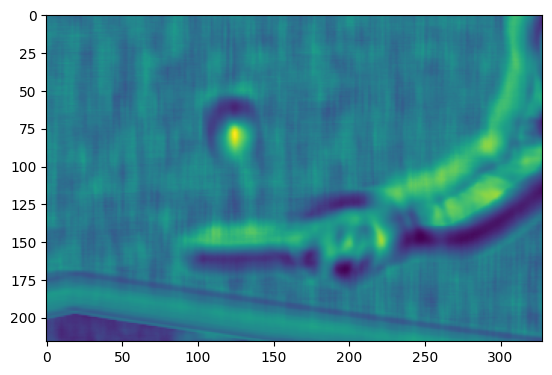

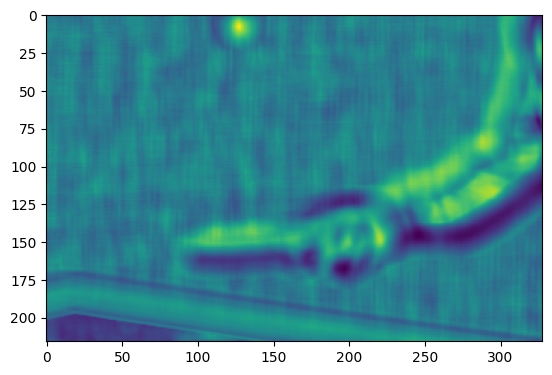

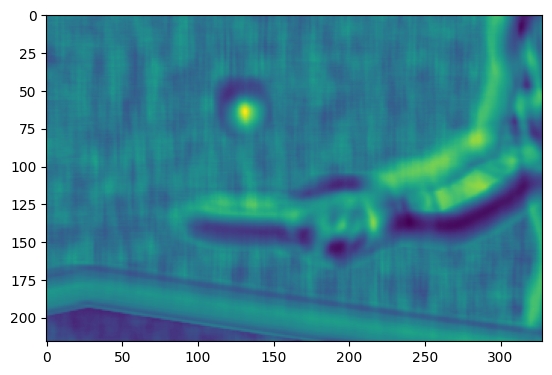

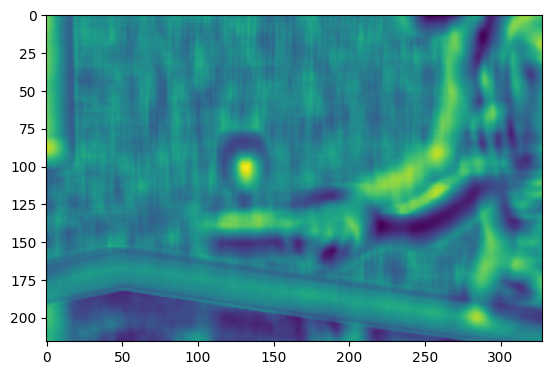

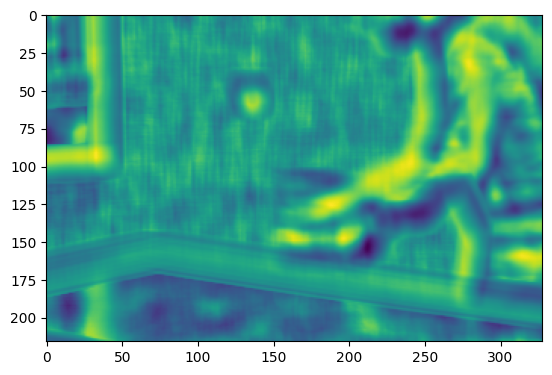

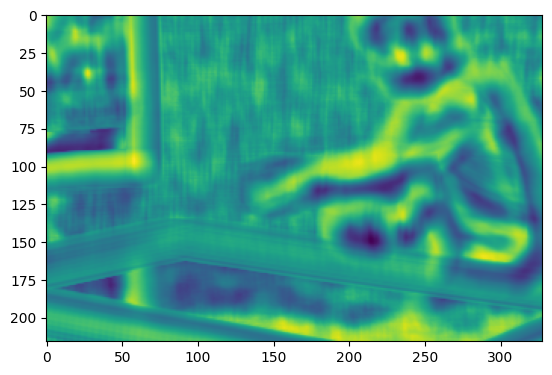

change template because of change in zoom setup!


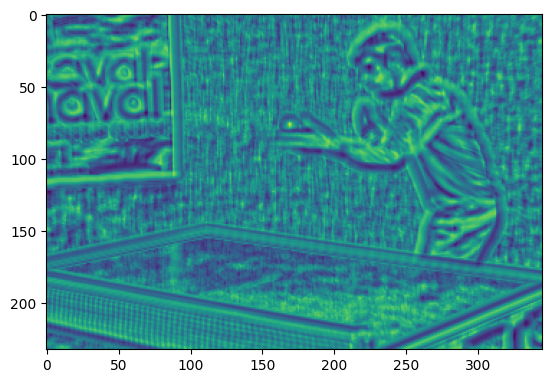

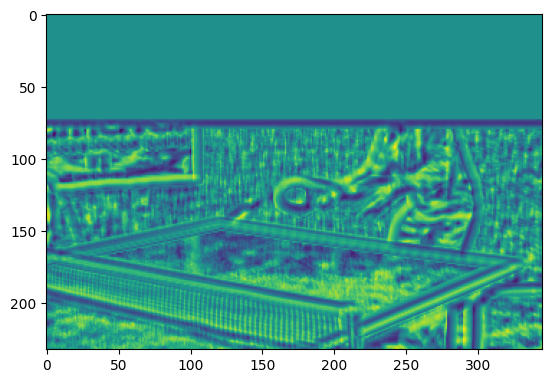

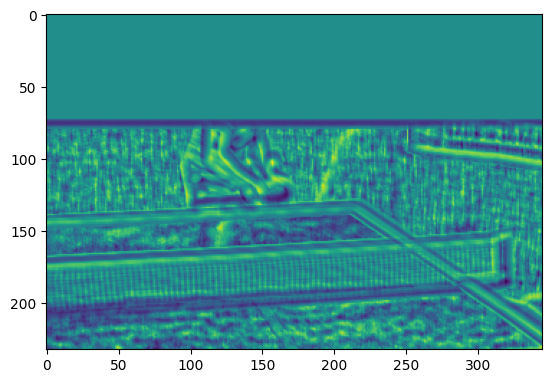

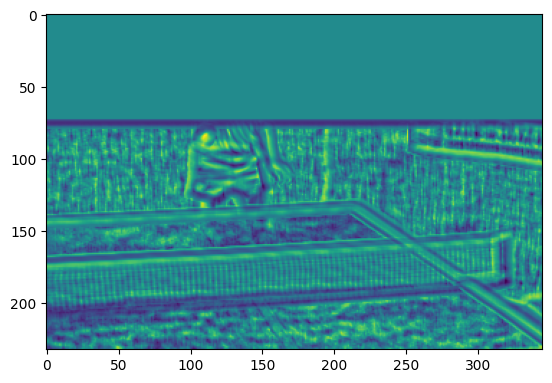

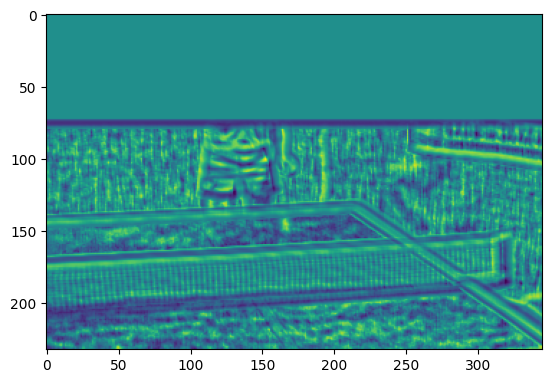

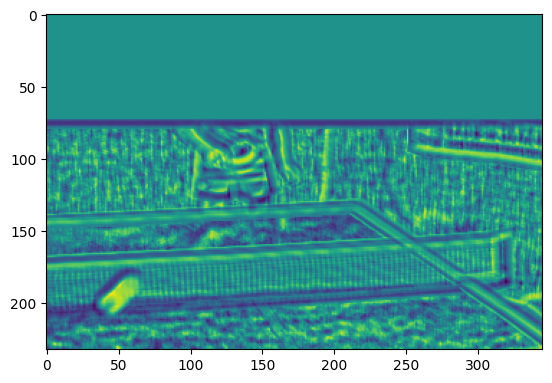

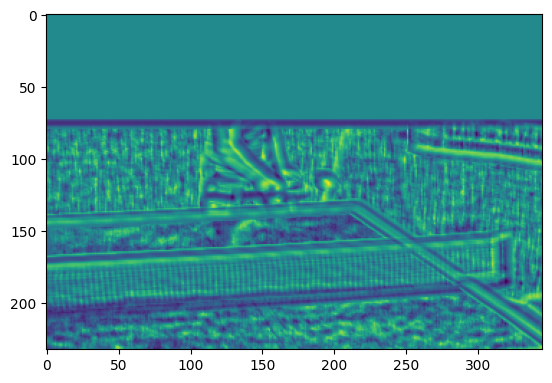

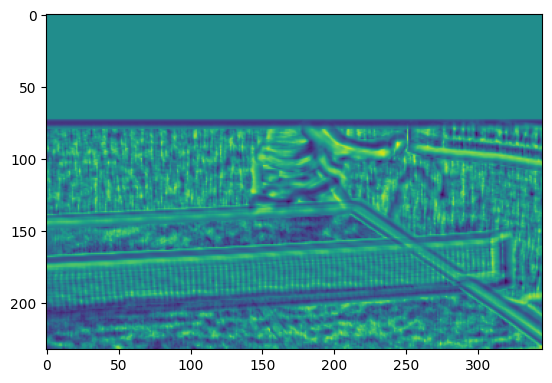

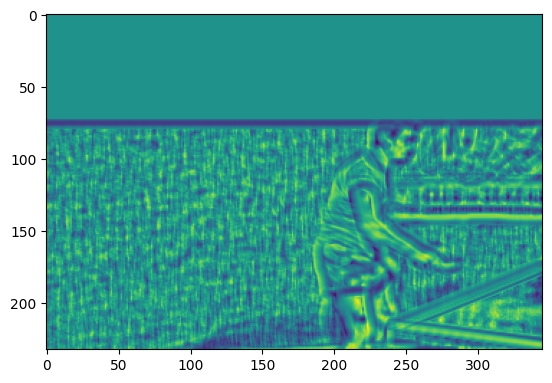

0

In [101]:
import cv2
import numpy as np
import subprocess
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the video
video_path = "pingpong.mp4"
cap = cv2.VideoCapture(video_path)

# Extract the template from the first frame
ret, frame = cap.read()

template = frame[55:80, 135:160]
cv2_imshow(template)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Define the threshold for template matching
threshold = 0.7

# Define the output video file name
output_filename = '/content/pingpong_output.mp4'

# Open the input video file
input_filename = '/content/pingpong.mp4'
cap = cv2.VideoCapture(input_filename)

# Get the frame rate and size of the input video
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create the output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_filename, fourcc, fps, (width, height))
counter = 0

# Loop over the frames of the input video
while cap.isOpened():
    counter +=1

    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # change template when change zoom
    if counter == 70:
      print("change template because of change in zoom setup!")
      template = gray_frame[76:84, 169:177]
      cv2_imshow(template)

    # remove white banner
    if counter>  70:
      gray_frame[0:80, :]  = 0

    # Perform template matching
    result = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)

    # show match map
    if counter %10 == 0:
      plt.imshow(result)
      plt.show()

    # Get the coordinates of the matched region
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

    # Draw a green rectangle around the matched region
    cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)

    # Write the frame with the highlighted ball to the output video
    out.write(frame)

# Release the input and output video files
cap.release()
out.release()

# Convert the output video file to MP4 format using FFmpeg
subprocess.call(['ffmpeg', '-i', output_filename, '-vcodec', 'copy', '-acodec', 'copy', 'output.mp4'])

# Delete the original output video file
subprocess.call(['rm', output_filename])
